## Validate SNIbc / SLSN group
### Goal: compare rest-frame colors between GHOST, full SLSN+stripped-envelope host library, and divided outputs by class

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import glob
from astropy import table
from matplotlib.gridspec import GridSpec


In [2]:
# set plot settings
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 18,
    "font.family":"serif"})

In [3]:
dc2full = pd.read_csv("/global/cscratch1/sd/mlokken/sn_hostenv/DC2full_pzRedshifts_31Healpix_sdss_updMag_Rkpc_Final.tar.gz")

In [4]:
dc2full.columns

Index(['galaxy_id', 'DC2redshift', 'PZflowredshift', 'Mag_true_g_sdss_z0',
       'Mag_true_r_sdss_z0', 'Mag_true_i_sdss_z0', 'Mag_true_z_sdss_z0',
       'R_kpc'],
      dtype='object')

In [20]:
def collect_snana_outputs(path): #path may be single or list
    if type(path)==str:
        headfiles = sorted(glob.glob(path+ '*HEAD.FITS.gz'))
        photfiles = sorted(glob.glob(path+ '*PHOT.FITS.gz'))
    elif type(path)==list:
        headfiles = []
        photfiles = []
        for p in path:
            headfiles.extend(sorted(glob.glob(p+ '*HEAD.FITS.gz')))
            photfiles.extend(sorted(glob.glob(p+ '*HEAD.FITS.gz')))
            
    c=0
    for file in headfiles:
        if c==0:
            headfile = table.Table.read(file, format='fits').to_pandas()
        else:
            headfile=headfile.append(table.Table.read(file, format='fits').to_pandas())
        c+=1
    # phots = []
    # for file in photfiles:
    #     photfile = table.Table.read(file, format='fits').to_pandas()
    #     phots.append(photfile)
    #     print(len(photfile))
    # concat_phots = pd.concat(phots)
    return headfile

def snhost_props(cat):
    u = cat['HOSTGAL_MAG_u']
    g = cat['HOSTGAL_MAG_g']
    r = cat['HOSTGAL_MAG_r']
    i = cat['HOSTGAL_MAG_i']
    z = cat['HOSTGAL_MAG_z']
    ellip  = cat['HOSTGAL_ELLIPTICITY']
    rshift = cat['REDSHIFT_FINAL']
    gr = g-r
    iz = i-z
    logmass = cat['SIM_HOSTLIB(LOGMASS_TRUE)']
    sfr = cat['SIM_HOSTLIB(LOG_SFR)']
    return(u,g,r,i,z,ellip,rshift,gr,iz,logmass,sfr)

def pull_cosmodc2_props(quantities, indices):
    quants = quantities+['galaxy_id']
    return pd.merge(dc2full[quants],indices, left_on='galaxy_id', right_on=indices.name)
    

In [29]:
# Import GHOST data
file = '../../data_files/GHOST_restFrame_condenseLabels_0323.csv'
ghost = pd.read_csv(file)
a = ghost['TransientClass'] == 'SN Ib'
b = ghost['TransientClass'] =='SN IIb'
c = ghost['TransientClass'] == 'SN Ic'
d = ghost['TransientClass'] == 'SLSN-I' # lump in SLSN hosts because there are too few of them for it to be its own hostlib
ghost_slsn = ghost[d]
ghost_slsn.reset_index(inplace=True)
ghost_ic = ghost[c]
ghost_ic.reset_index(inplace=True)
ghost = ghost[a | b | c | d]
ghost.reset_index(inplace=True)
print("Number: {:d}".format(len(ghost)))
transient_class = ghost['TransientClass']
gG = ghost['gKronMag_SDSS_abs']
gR = ghost['rKronMag_SDSS_abs']
gI = ghost['iKronMag_SDSS_abs']
gZ = ghost['zKronMag_SDSS_abs']
g_rshift = ghost['NED_redshift']
g_rshift2 = ghost['TransientRedshift']
g_ellip  = ghost['r_ellip']
g_gr   = ghost['g-r_SDSS_rest']
g_ri   = ghost['r-i_SDSS_rest']
g_iz   = ghost['i-z_SDSS_rest']


Number: 506


In [30]:
print("Number: {:d}".format(len(ghost_slsn)))
g_gr_slsn   = ghost_slsn['g-r_SDSS_rest']
g_ri_slsn   = ghost_slsn['r-i_SDSS_rest']
g_iz_slsn   = ghost_slsn['i-z_SDSS_rest']

print("Number: {:d}".format(len(ghost_ic)))
g_gr_ic   = ghost_ic['g-r_SDSS_rest']
g_ri_ic   = ghost_ic['r-i_SDSS_rest']
g_iz_ic   = ghost_ic['i-z_SDSS_rest']


Number: 29
Number: 235


In [31]:
ls /global/cfs/cdirs/lsst/groups/SN/snana/SURVEYS/LSST/ROOT/ELASTICC/HOSTLIB/

AAA_README              SNIb_GHOST.WGTMAP.gz
AGN_GHOST.WGTMAP.gz     SNIbc_GHOST.HOSTLIB.gz
KN_GHOST.WGTMAP.gz      SNIcBL_GHOST.WGTMAP.gz
SLSNI_GHOST.WGTMAP.gz   SNIc_GHOST.WGTMAP.gz
SN91bg_GHOST.WGTMAP.gz  TDE_GHOST.WGTMAP.gz
SNII_GHOST.HOSTLIB.gz   UNMATCHED_COSMODC2_GHOST.HOSTLIB.gz
SNII_GHOST.WGTMAP.gz    UNMATCHED_KN_SHIFT_GHOST.HOSTLIB.gz
SNIa_GHOST.HOSTLIB.gz   archive/
SNIa_GHOST.WGTMAP.gz    v0_SciBook2009/
SNIax_GHOST.WGTMAP.gz


## Read Hostlib

In [9]:
hostlib = pd.read_csv("/global/cfs/cdirs/lsst/groups/SN/snana/SURVEYS/LSST/ROOT/ELASTICC/HOSTLIB/SNIbc_GHOST.HOSTLIB.gz", sep='  ', header=24)


/usr/common/software/python/3.9-anaconda-2021.11/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [10]:
hostlib = hostlib.sample(n=10000)
quantities = ['Mag_true_r_sdss_z0', 'Mag_true_g_sdss_z0', 'Mag_true_i_sdss_z0']
idx = hostlib['GALID']
hosts = pull_cosmodc2_props(quantities, idx)

## Read SNANA Outputs

In [16]:
ls /global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k//

MLAG_SCOTCH10k_AGN01/                  MLAG_SCOTCH10k_SNIIn-MOSFIT/
MLAG_SCOTCH10k_AGN20/                  MLAG_SCOTCH10k_SNIa-91bg/
MLAG_SCOTCH10k_KN_B19/                 MLAG_SCOTCH10k_SNIa-SALT2/
MLAG_SCOTCH10k_KN_K17/                 MLAG_SCOTCH10k_SNIax/
MLAG_SCOTCH10k_SLSN-I/                 MLAG_SCOTCH10k_SNIb+HostXT_V19/
MLAG_SCOTCH10k_SNII+HostXT_V19/        MLAG_SCOTCH10k_SNIb-Templates/
MLAG_SCOTCH10k_SNII+HostXT_V19.tar.gz  MLAG_SCOTCH10k_SNIc+HostXT_V19/
MLAG_SCOTCH10k_SNII-NMF/               MLAG_SCOTCH10k_SNIc+HostXT_V19.tar.gz
MLAG_SCOTCH10k_SNII-Templates/         MLAG_SCOTCH10k_SNIc-Templates/
MLAG_SCOTCH10k_SNIIb+HostXT_V19/       MLAG_SCOTCH10k_SNIcBL+HostXT_V19/
MLAG_SCOTCH10k_SNIIn+HostXT_V19/       MLAG_SCOTCH10k_TDE/


In [17]:
snana_path = "/global/cscratch1/sd/kessler/SNANA_LSST_SIM/SCOTCH10k/"

In [21]:
ib = pd.concat([collect_snana_outputs(snana_path+'MLAG_SCOTCH10k_SNIb+HostXT_V19/'), collect_snana_outputs(snana_path+'MLAG_SCOTCH10k_SNIb-Templates/')])
# ib = ib.sample(n=10000)
idx = ib['HOSTGAL_OBJID']
ib = pull_cosmodc2_props(quantities, idx)
print("done reading ib")


done reading ib


In [22]:
for col in ib.columns:
    print(col)

Mag_true_r_sdss_z0
Mag_true_g_sdss_z0
Mag_true_i_sdss_z0
galaxy_id
HOSTGAL_OBJID


In [23]:
ic = pd.concat([collect_snana_outputs(snana_path+'MLAG_SCOTCH10k_SNIc+HostXT_V19/'), collect_snana_outputs(snana_path+'MLAG_SCOTCH10k_SNIc-Templates/')])
# ic = ic.sample(n=10000)
idx = ic['HOSTGAL_OBJID']
ic = pull_cosmodc2_props(quantities, idx)
print("done reading ic")


done reading ic


In [26]:
icbl = collect_snana_outputs(snana_path+'MLAG_SCOTCH10k_SNIcBL+HostXT_V19/')
icbl = icbl.sample(n=10000)
idx = icbl['HOSTGAL_OBJID']
icbl = pull_cosmodc2_props(quantities, idx)
print("done reading icbl")
slsn = collect_snana_outputs(snana_path+'MLAG_SCOTCH10k_SLSN-I/')
# slsn = slsn.sample(n=10000)
idx = slsn['HOSTGAL_OBJID']
slsn = pull_cosmodc2_props(quantities, idx)
print("done reading slsn")

done reading icbl
done reading slsn


In [27]:
all = pd.concat([ic, ib, slsn, icbl])

Text(-0.2, 3.1, '$\\bf{Ic-BL}$')

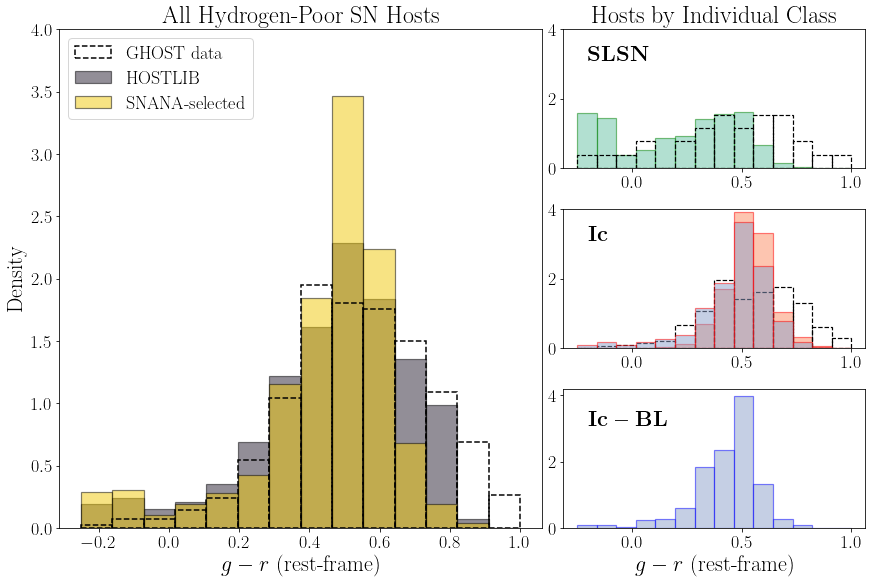

In [33]:
bins1=np.linspace(-.25,1,15)
bins2=np.linspace(-.2,1.05,15)
bins3=np.linspace(-.3,.95,15)
figsize=[7,12]
from matplotlib.patches import ConnectionPatch
fig = plt.figure(constrained_layout=True, figsize=[12,8])
gs = GridSpec(3, 3, figure=fig, width_ratios=[.8,.8,1])
# ax1 = fig.add_subplot(gs[0, :])

ax1 = fig.add_subplot(gs[:, 0:2])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 2])
ax4 = fig.add_subplot(gs[2, 2])

ax1.hist(g_gr, color='black', histtype='bar', bins=bins1, linewidth=1.5, edgecolor='black', density=True, label='GHOST data', fill=False, linestyle='--', zorder=3)
ax1.hist(hosts['Mag_true_g_sdss_z0']-hosts['Mag_true_r_sdss_z0'], color='#271F30',alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='black', density=True, label='HOSTLIB')
ax1.hist(all['Mag_true_g_sdss_z0']-all['Mag_true_r_sdss_z0'], color='#F0C808', alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='black', density=True, label='SNANA-selected')

ax1.set_title("All Hydrogen-Poor SN Hosts", fontsize=24, usetex=True)
ax1.legend(loc='upper left')
ax1.set_ylabel("Density", fontsize=22)
ax1.set_xlabel("$g-r$ (rest-frame)", fontsize=22)

ax2.hist(slsn['Mag_true_g_sdss_z0']-slsn['Mag_true_r_sdss_z0'], label='SNANA-selected', color='#66c2a5', alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='green', density=True)
ax2.hist(g_gr_slsn, label='GHOST',  histtype='bar', linestyle='--', bins=bins1, linewidth=1.2, edgecolor='black', density=True, fill=False)
ax2.text(-.2,3.1,"$\\bf{SLSN}$",  fontsize=22)
ax2.set_title("Hosts by Individual Class", fontsize=24)
# ax2.legend()

ax3.hist(ic['Mag_true_g_sdss_z0']-ic['Mag_true_r_sdss_z0'], label='SNANA-selected', color='#fc8d62', alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='red', density=True)
ax3.hist(g_gr_ic, label='Ic, GHOST', histtype='bar', linestyle='--', bins=bins1, linewidth=1.2, edgecolor='black', density=True, fill=False)
ax3.hist(ib['Mag_true_g_sdss_z0']-ib['Mag_true_r_sdss_z0'], label='SNANA-selected', color='#8da0cb', alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='red', density=True)
# ax3.legend(loc='upper left')
ax3.text(-.2,3.1,"$\\bf{Ic}$",  fontsize=22)


ax4.hist(icbl['Mag_true_g_sdss_z0']-icbl['Mag_true_r_sdss_z0'], label='Ic-BL, sim', color='#8da0cb', alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='blue', density=True)
for ax in [ax1,ax2,ax3]:
    ax.set_ylim([0,4])
ax4.set_xlabel("$g-r$ (rest-frame)", fontsize=22)    
ax4.text(-.2,3.1,"$\\bf{Ic-BL}$",  fontsize=22)
    
# plt.savefig("../plots/snibc_steps_in_process.png")


# ax[3].hist(ibc['Mag_true_g_sdss_z0']-ibc['Mag_true_r_sdss_z0'], label='SN Ibc', color='#fc8d62', alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='red', density=True)

# # ax[2].hist(ic['Mag_true_g_sdss_z0']-ic['Mag_true_r_sdss_z0'], label='SN Ic', color='#fc8d62', alpha=.5, histtype='bar', bins=bins, linewidth=1.2, edgecolor='orange', density=True)
# ax[2].set_title("Final Selected Hosts")
# ax[3].set_title("Final Selected Hosts")
# for i in range(4):
#     ax[i].set_ylim([0,4])

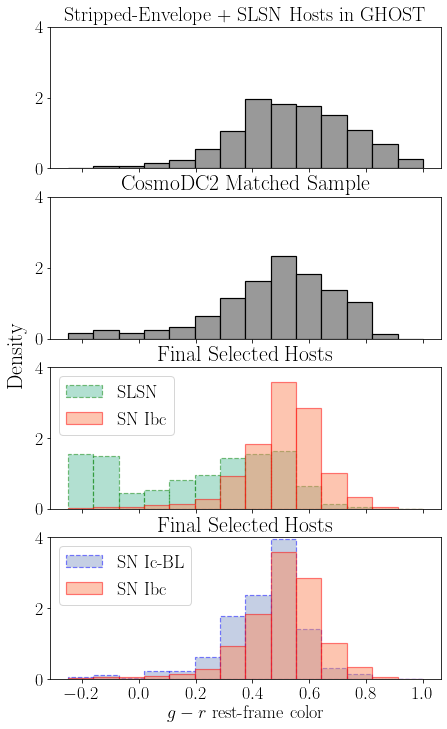

In [71]:
nrows=4
bins1=np.linspace(-.25,1,15)
bins2=np.linspace(-.2,1.05,15)
bins3=np.linspace(-.3,.95,15)
figsize=[7,12]
fig,ax = plt.subplots(nrows=2,ncols=2,figsize=figsize,sharex=True)

ax[0].hist(g_gr, color='black', histtype='bar', bins=bins1, linewidth=1.2, edgecolor='black', density=True, label='GHOST')
ax[0].hist(hosts['Mag_true_g_sdss_z0']-hosts['Mag_true_r_sdss_z0'], color='0.6', histtype='bar', bins=bins1, linewidth=1.2, edgecolor='black', density=True, label='CosmoDC2 NN-Matched')
ax[0].set_title("Stripped-Envelope + SLSN Hosts", fontsize=20, usetex=True)

# ax[1].set_title("CosmoDC2 Matched Sample")
# ax[2].hist(slsn['Mag_true_g_sdss_z0']-slsn['Mag_true_r_sdss_z0'], label='SLSN', color='#66c2a5', alpha=.5, histtype='bar', linestyle='--', bins=bins1, linewidth=1.2, edgecolor='green', density=True)
# ax[2].hist(ibc['Mag_true_g_sdss_z0']-ibc['Mag_true_r_sdss_z0'], label='SN Ibc', color='#fc8d62', alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='red', density=True)
# # ax[2].hist(ic['Mag_true_g_sdss_z0']-ic['Mag_true_r_sdss_z0'], label='SN Ic', color='#fc8d62', alpha=.5, histtype='bar', bins=bins, linewidth=1.2, edgecolor='orange', density=True)
# ax[2].set_title("Final Selected Hosts")
# ax[3].set_title("Final Selected Hosts")
# ax[3].hist(icbl['Mag_true_g_sdss_z0']-icbl['Mag_true_r_sdss_z0'], label='SN Ic-BL', color='#8da0cb', alpha=.5, histtype='bar',linestyle='--', bins=bins1, linewidth=1.2, edgecolor='blue', density=True)
# ax[3].hist(ibc['Mag_true_g_sdss_z0']-ibc['Mag_true_r_sdss_z0'], label='SN Ibc', color='#fc8d62', alpha=.5, histtype='bar', bins=bins1, linewidth=1.2, edgecolor='red', density=True)
# for i in range(4):
#     ax[i].set_ylim([0,4])

# ax[2].legend()
# ax[3].legend()
# ax[3].set_xlabel("$g-r$ rest-frame color")
# fig.text(0.04, 0.5, 'Density', va='center', rotation='vertical', fontsize=22)
# plt.savefig("../plots/snibc_steps_in_process.png")